In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Hacakthon 2 Dataset.csv', delimiter = ';')
df.head()

,Destination Display Name,Destination Geometry,Date,Travel time (seconds),DriverID,Time,Unsafe
0,"4800 Balderama, Makati","[121,005416381948; 14,5501868058048]",31 07 2016,1224,5820,0:00:38,safe
1,"0 1st Street, Quezon City","[121,034062093452; 14,6142310276554]",31 07 2016,1385,5511,0:00:52,safe
2,"0 Hydra, Makati","[121,031114652068; 14,5616123563658]",31 07 2016,2257,5405,0:01:46,safe
3,"Roxas Boulevard, Pasay","[120,989193110978; 14,5378405260156]",31 07 2016,1242,5262,0:02:26,safe
4,"100 Jupiter, Mandaluyong","[121,019737475982; 14,5822100699773]",31 07 2016,1787,5511,0:02:36,safe


### Time Analysis

In [3]:
df1 = df['Time'].str.split(':', n = 2, expand=True)

In [4]:
df1['Time'] = df['Time']
df1.head()

,0,1,2,Time
0,0,00,38,0:00:38
1,0,00,52,0:00:52
2,0,01,46,0:01:46
3,0,02,26,0:02:26
4,0,02,36,0:02:36


In [5]:
df1.columns = ['Hour','Minute','Second','Time']
df1.head()

,Hour,Minute,Second,Time
0,0,00,38,0:00:38
1,0,00,52,0:00:52
2,0,01,46,0:01:46
3,0,02,26,0:02:26
4,0,02,36,0:02:36


In [6]:
df1 = df1.astype({'Hour':'int',
                  'Minute':'int',
                  'Second':'int'})

In [7]:
def rounded(x):
    if x < 30:
        return 0
    else:
        return 1

In [8]:
df1['Second'] = df1['Second'].apply(rounded)

In [9]:
df1['Minute'] = df1['Minute'] + df1['Second']
df1['Minute'] = df1['Minute'].apply(rounded)

In [10]:
df1['Hour'] = df1['Hour'] + df1['Minute']

In [11]:
df1 = df1.drop(columns=['Minute', 'Second', 'Time'])

In [12]:
df['Rounded Hour'] = df1['Hour']
df.head()

,Destination Display Name,Destination Geometry,Date,Travel time (seconds),DriverID,Time,Unsafe,Rounded Hour
0,"4800 Balderama, Makati","[121,005416381948; 14,5501868058048]",31 07 2016,1224,5820,0:00:38,safe,0
1,"0 1st Street, Quezon City","[121,034062093452; 14,6142310276554]",31 07 2016,1385,5511,0:00:52,safe,0
2,"0 Hydra, Makati","[121,031114652068; 14,5616123563658]",31 07 2016,2257,5405,0:01:46,safe,0
3,"Roxas Boulevard, Pasay","[120,989193110978; 14,5378405260156]",31 07 2016,1242,5262,0:02:26,safe,0
4,"100 Jupiter, Mandaluyong","[121,019737475982; 14,5822100699773]",31 07 2016,1787,5511,0:02:36,safe,0


In [13]:
df2 = df['Date'].str.split(' ', n = 2, expand=True)

In [14]:
df2['Date'] = df['Date']
df2.head()

,0,1,2,Date
0,31,07,2016,31 07 2016
1,31,07,2016,31 07 2016
2,31,07,2016,31 07 2016
3,31,07,2016,31 07 2016
4,31,07,2016,31 07 2016


In [15]:
df2.columns = ['Day','Month','Year','Date']
df2.head()

,Day,Month,Year,Date
0,31,07,2016,31 07 2016
1,31,07,2016,31 07 2016
2,31,07,2016,31 07 2016
3,31,07,2016,31 07 2016
4,31,07,2016,31 07 2016


In [16]:
df2['Date2'] = df2['Year'] + '-' + df2['Month'] + '-' + df2['Day']
df2.head()

,Day,Month,Year,Date,Date2
0,31,07,2016,31 07 2016,2016-07-31
1,31,07,2016,31 07 2016,2016-07-31
2,31,07,2016,31 07 2016,2016-07-31
3,31,07,2016,31 07 2016,2016-07-31
4,31,07,2016,31 07 2016,2016-07-31


In [17]:
df2['Date2'] = pd.to_datetime(df2['Date2'])

In [18]:
df2['Weekday'] = df2['Date2'].dt.weekday

In [19]:
df2['Month'] = df2['Date2'].dt.month
df2.head()

,Day,Month,Year,Date,Date2,Weekday
0,31,7,2016,31 07 2016,2016-07-31,6
1,31,7,2016,31 07 2016,2016-07-31,6
2,31,7,2016,31 07 2016,2016-07-31,6
3,31,7,2016,31 07 2016,2016-07-31,6
4,31,7,2016,31 07 2016,2016-07-31,6


In [20]:
df['Month'] = df2['Month']
df['Weekday'] = df2['Weekday']
df['Date'] = df2['Date2']
df['Day'] = df2['Day']
df.head()

,Destination Display Name,Destination Geometry,Date,Travel time (seconds),DriverID,Time,Unsafe,Rounded Hour,Month,Weekday,Day
0,"4800 Balderama, Makati","[121,005416381948; 14,5501868058048]",2016-07-31,1224,5820,0:00:38,safe,0,7,6,31
1,"0 1st Street, Quezon City","[121,034062093452; 14,6142310276554]",2016-07-31,1385,5511,0:00:52,safe,0,7,6,31
2,"0 Hydra, Makati","[121,031114652068; 14,5616123563658]",2016-07-31,2257,5405,0:01:46,safe,0,7,6,31
3,"Roxas Boulevard, Pasay","[120,989193110978; 14,5378405260156]",2016-07-31,1242,5262,0:02:26,safe,0,7,6,31
4,"100 Jupiter, Mandaluyong","[121,019737475982; 14,5822100699773]",2016-07-31,1787,5511,0:02:36,safe,0,7,6,31


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
Destination Display Name    200000 non-null object
Destination Geometry        200000 non-null object
Date                        200000 non-null datetime64[ns]
Travel time (seconds)       200000 non-null int64
DriverID                    200000 non-null int64
Time                        200000 non-null object
Unsafe                      200000 non-null object
Rounded Hour                200000 non-null int64
Month                       200000 non-null int64
Weekday                     200000 non-null int64
Day                         200000 non-null object
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 16.8+ MB


In [22]:
df['Day'] = df['Day'].astype(int)

([<matplotlib.axis.XTick at 0x1d4b22ac2b0>,
 <a list of 7 Text xticklabel objects>)

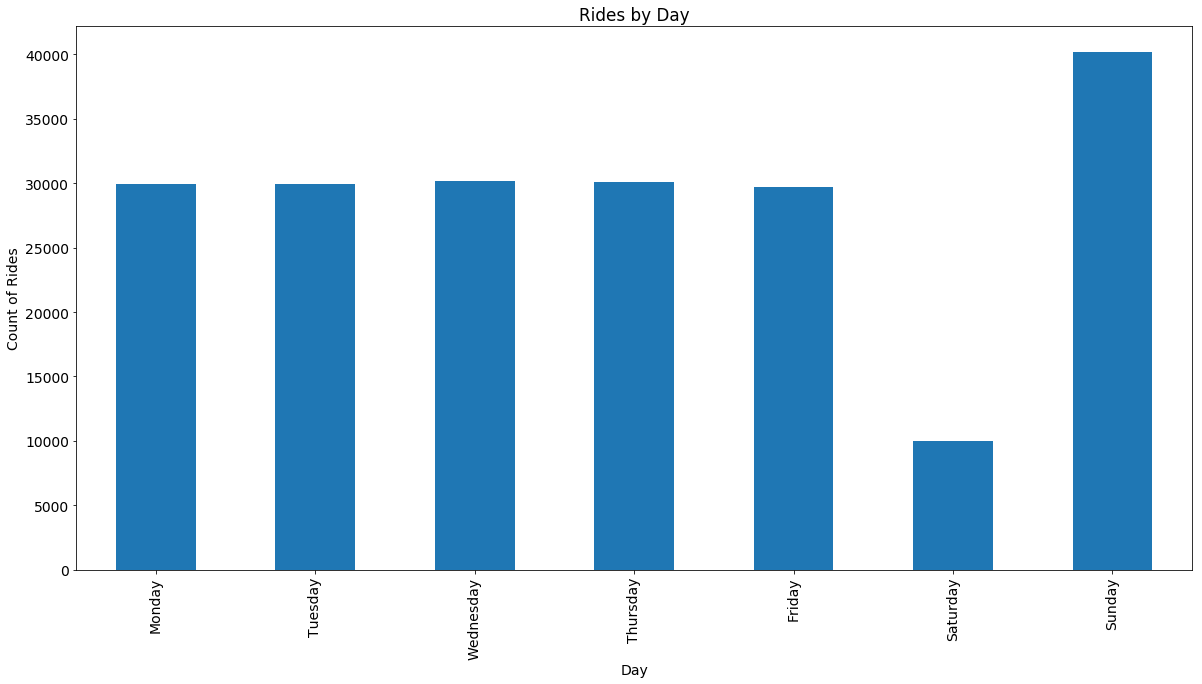

In [23]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 14})
df.groupby('Weekday')['Weekday'].count().plot.bar()
plt.xlabel('Day')
plt.ylabel('Count of Rides')
plt.title('Rides by Day')
plt.xticks(np.arange(7), ('Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'))

([<matplotlib.axis.XTick at 0x1d4b2274a90>,
 <a list of 7 Text xticklabel objects>)

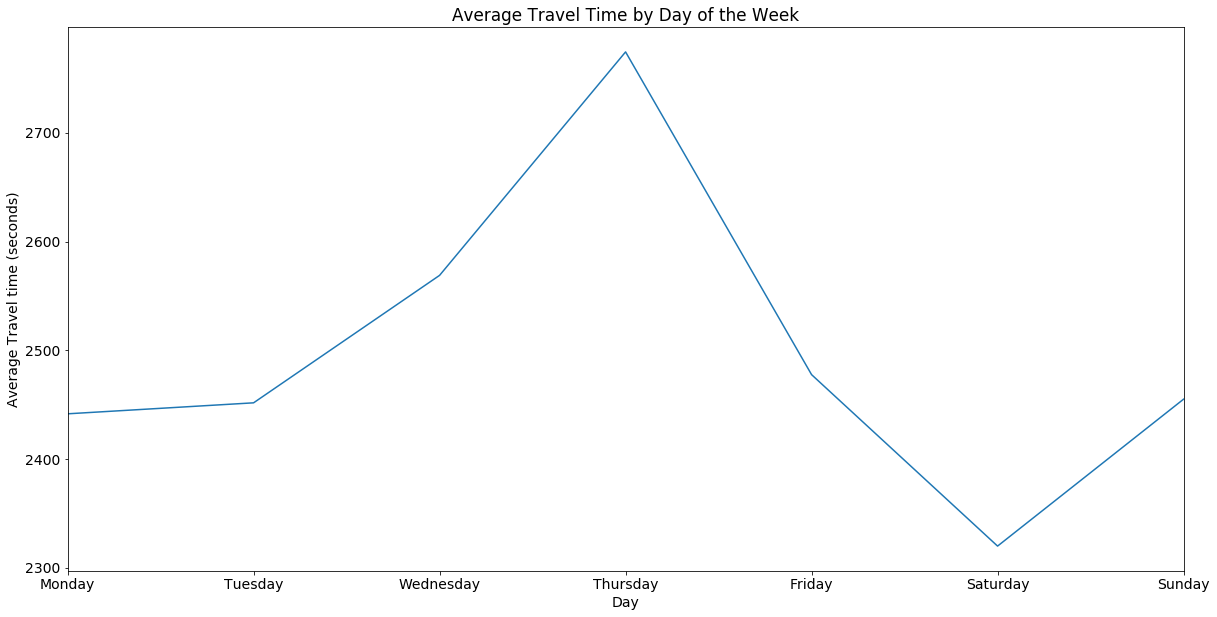

In [24]:
plt.figure(figsize=(20,10))
df.groupby('Weekday')['Travel time (seconds)'].mean().plot()
plt.xlabel('Day')
plt.ylabel('Average Travel time (seconds)')
plt.title('Average Travel Time by Day of the Week')
plt.xticks(np.arange(7), ('Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'))

Text(0.5, 1.0, 'Average Travel Time over Month')

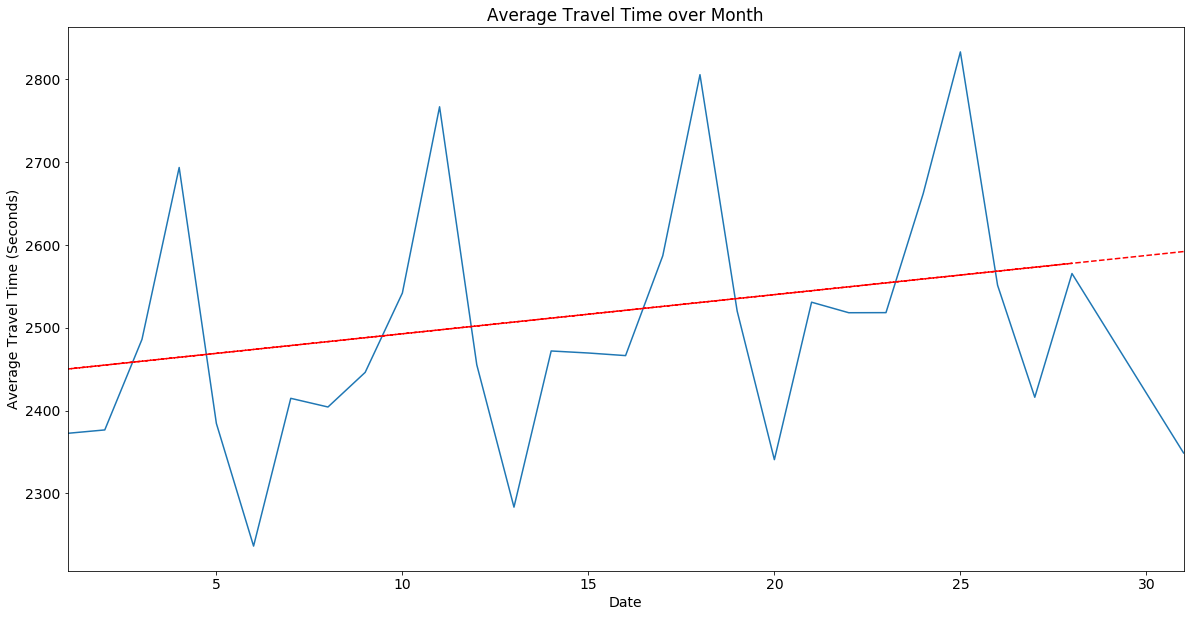

In [25]:
plt.figure(figsize=(20,10))

df.groupby('Day')['Travel time (seconds)'].mean().plot()

x = df['Day']
y = df['Travel time (seconds)']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.xlabel('Date')
plt.ylabel('Average Travel Time (Seconds)')
plt.title('Average Travel Time over Month')

Text(0.5, 1.0, 'Average Travel Time by Hour of Day')

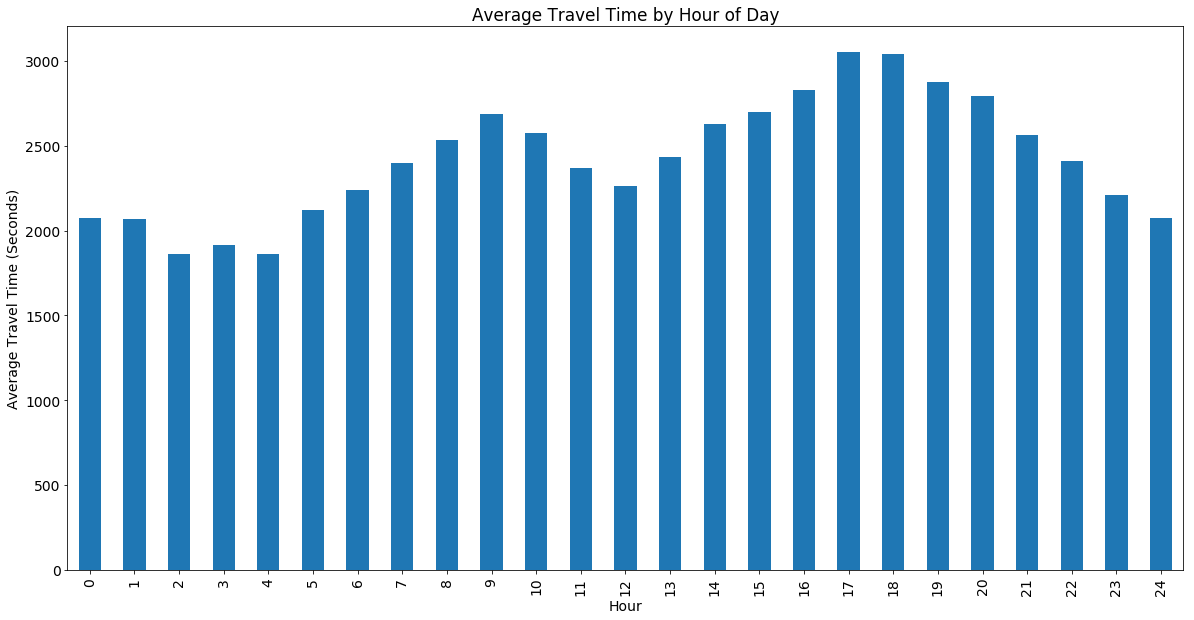

In [26]:
plt.figure(figsize=(20,10))
df.groupby('Rounded Hour')['Travel time (seconds)'].mean().plot.bar()
plt.xlabel('Hour')
plt.ylabel('Average Travel Time (Seconds)')
plt.title('Average Travel Time by Hour of Day')

([<matplotlib.axis.XTick at 0x1d4b21bc6a0>,
 <a list of 7 Text xticklabel objects>)

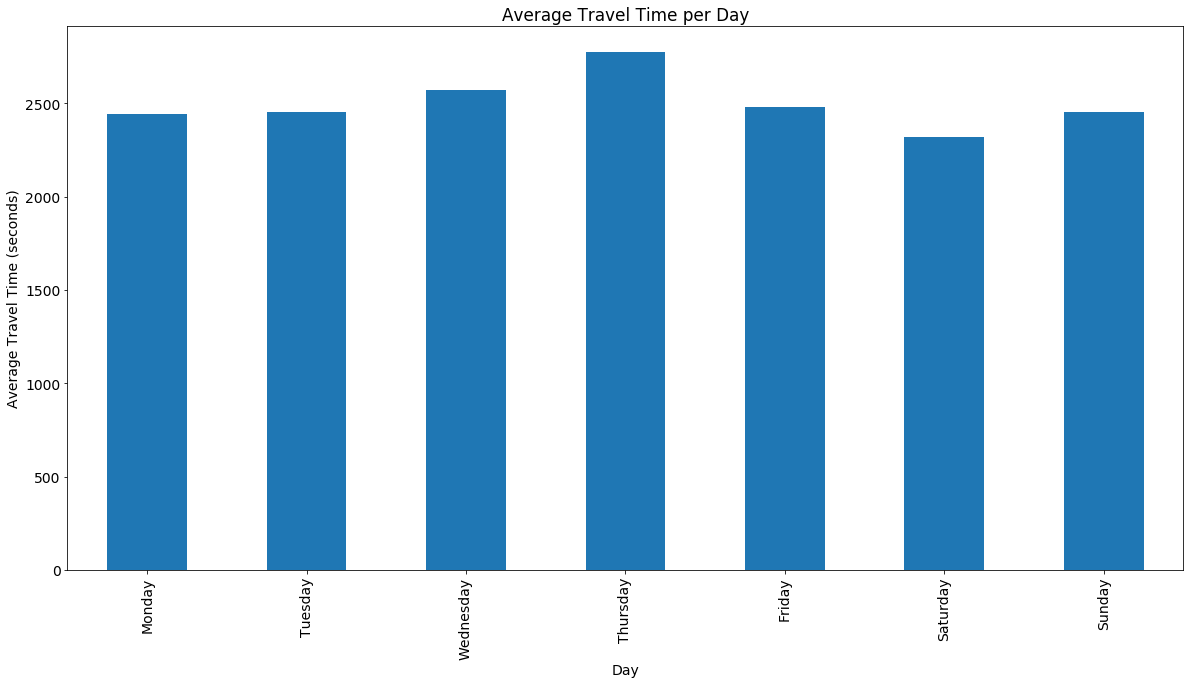

In [27]:
plt.figure(figsize=(20,10))
df.groupby('Weekday')['Travel time (seconds)'].mean().plot.bar()
plt.xlabel('Day')
plt.ylabel('Average Travel Time (seconds)')
plt.title('Average Travel Time per Day')
plt.xticks(np.arange(7), ('Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'))

Text(0.5, 1.0, 'Average Travel Time by Day and Time')

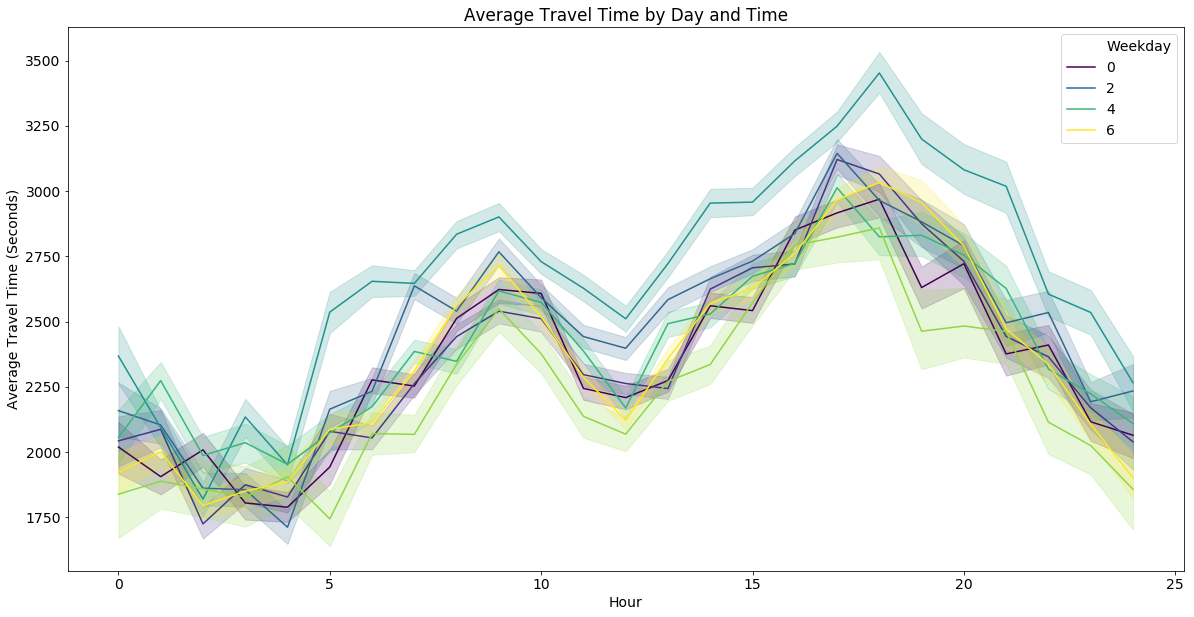

In [28]:
plt.figure(figsize=(20,10))
sns.lineplot(x=df['Rounded Hour'], y=df['Travel time (seconds)'], hue=df['Weekday'], palette='viridis')
plt.xlabel('Hour')
plt.ylabel('Average Travel Time (Seconds)')
plt.title('Average Travel Time by Day and Time')

Text(0.5, 1.0, 'Rides by Time of Day')

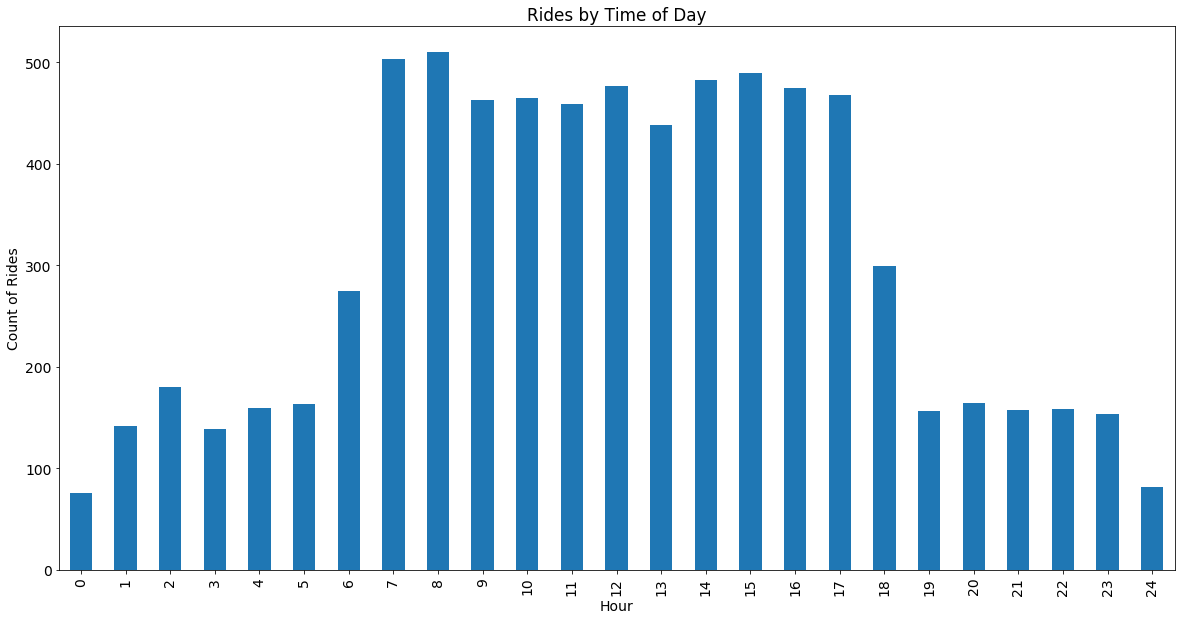

In [29]:
plt.figure(figsize=(20,10))
df7 = df[df['Day'] == 31]
df7.groupby('Rounded Hour')['Rounded Hour'].count().plot.bar()
plt.xlabel('Hour')
plt.ylabel('Count of Rides')
plt.title('Rides by Time of Day')

### Spatial Analysis

In [30]:
df.head()

,Destination Display Name,Destination Geometry,Date,Travel time (seconds),DriverID,Time,Unsafe,Rounded Hour,Month,Weekday,Day
0,"4800 Balderama, Makati","[121,005416381948; 14,5501868058048]",2016-07-31,1224,5820,0:00:38,safe,0,7,6,31
1,"0 1st Street, Quezon City","[121,034062093452; 14,6142310276554]",2016-07-31,1385,5511,0:00:52,safe,0,7,6,31
2,"0 Hydra, Makati","[121,031114652068; 14,5616123563658]",2016-07-31,2257,5405,0:01:46,safe,0,7,6,31
3,"Roxas Boulevard, Pasay","[120,989193110978; 14,5378405260156]",2016-07-31,1242,5262,0:02:26,safe,0,7,6,31
4,"100 Jupiter, Mandaluyong","[121,019737475982; 14,5822100699773]",2016-07-31,1787,5511,0:02:36,safe,0,7,6,31


In [31]:
df3 = df['Destination Geometry'].str.split(';', n = 2, expand=True)

In [32]:
df3.head()

,0,1
0,"[121,005416381948","14,5501868058048]"
1,"[121,034062093452","14,6142310276554]"
2,"[121,031114652068","14,5616123563658]"
3,"[120,989193110978","14,5378405260156]"
4,"[121,019737475982","14,5822100699773]"


In [33]:
df3.columns = ['Longitude', 'Latitude']
df3.head()

,Longitude,Latitude
0,"[121,005416381948","14,5501868058048]"
1,"[121,034062093452","14,6142310276554]"
2,"[121,031114652068","14,5616123563658]"
3,"[120,989193110978","14,5378405260156]"
4,"[121,019737475982","14,5822100699773]"


In [34]:
df3['Longitude'] = df3['Longitude'].str.strip('[')
df3['Latitude'] = df3['Latitude'].str.strip(']')
df3.head()

,Longitude,Latitude
0,"121,005416381948","14,5501868058048"
1,"121,034062093452","14,6142310276554"
2,"121,031114652068","14,5616123563658"
3,"120,989193110978","14,5378405260156"
4,"121,019737475982","14,5822100699773"


In [35]:
df3 = df3.replace(to_replace=',', value='.', regex=True)
df3.head()

,Longitude,Latitude
0,121.005416381948,14.5501868058048
1,121.034062093452,14.6142310276554
2,121.031114652068,14.5616123563658
3,120.989193110978,14.5378405260156
4,121.019737475982,14.5822100699773


In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
Longitude    200000 non-null object
Latitude     200000 non-null object
dtypes: object(2)
memory usage: 3.1+ MB


In [37]:
df3 = df3.astype({'Longitude':'float',
                  'Latitude':'float'})
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
Longitude    200000 non-null float64
Latitude     200000 non-null float64
dtypes: float64(2)
memory usage: 3.1 MB


In [38]:
df['Longitude'] = df3['Longitude']
df['Latitude'] = df3['Latitude']
df.head()

,Destination Display Name,Destination Geometry,Date,Travel time (seconds),DriverID,Time,Unsafe,Rounded Hour,Month,Weekday,Day,Longitude,Latitude
0,"4800 Balderama, Makati","[121,005416381948; 14,5501868058048]",2016-07-31,1224,5820,0:00:38,safe,0,7,6,31,121.005416,14.550187
1,"0 1st Street, Quezon City","[121,034062093452; 14,6142310276554]",2016-07-31,1385,5511,0:00:52,safe,0,7,6,31,121.034062,14.614231
2,"0 Hydra, Makati","[121,031114652068; 14,5616123563658]",2016-07-31,2257,5405,0:01:46,safe,0,7,6,31,121.031115,14.561612
3,"Roxas Boulevard, Pasay","[120,989193110978; 14,5378405260156]",2016-07-31,1242,5262,0:02:26,safe,0,7,6,31,120.989193,14.537841
4,"100 Jupiter, Mandaluyong","[121,019737475982; 14,5822100699773]",2016-07-31,1787,5511,0:02:36,safe,0,7,6,31,121.019737,14.582210


In [39]:
def time(x):
    if x < 1200:
        return '<20 minutes'
    if x < 2400:
        return '20-40 minutes'
    if x < 3600:
        return '40-60 minutes'
    else:
        return '>60 minutes'

In [40]:
df['Travel Time Group'] = df['Travel time (seconds)'].apply(time)
df.head()

,Destination Display Name,Destination Geometry,Date,Travel time (seconds),DriverID,Time,Unsafe,Rounded Hour,Month,Weekday,Day,Longitude,Latitude,Travel Time Group
0,"4800 Balderama, Makati","[121,005416381948; 14,5501868058048]",2016-07-31,1224,5820,0:00:38,safe,0,7,6,31,121.005416,14.550187,20-40 minutes
1,"0 1st Street, Quezon City","[121,034062093452; 14,6142310276554]",2016-07-31,1385,5511,0:00:52,safe,0,7,6,31,121.034062,14.614231,20-40 minutes
2,"0 Hydra, Makati","[121,031114652068; 14,5616123563658]",2016-07-31,2257,5405,0:01:46,safe,0,7,6,31,121.031115,14.561612,20-40 minutes
3,"Roxas Boulevard, Pasay","[120,989193110978; 14,5378405260156]",2016-07-31,1242,5262,0:02:26,safe,0,7,6,31,120.989193,14.537841,20-40 minutes
4,"100 Jupiter, Mandaluyong","[121,019737475982; 14,5822100699773]",2016-07-31,1787,5511,0:02:36,safe,0,7,6,31,121.019737,14.582210,20-40 minutes


Text(0.5, 1.0, 'Average Travel Time by Location')

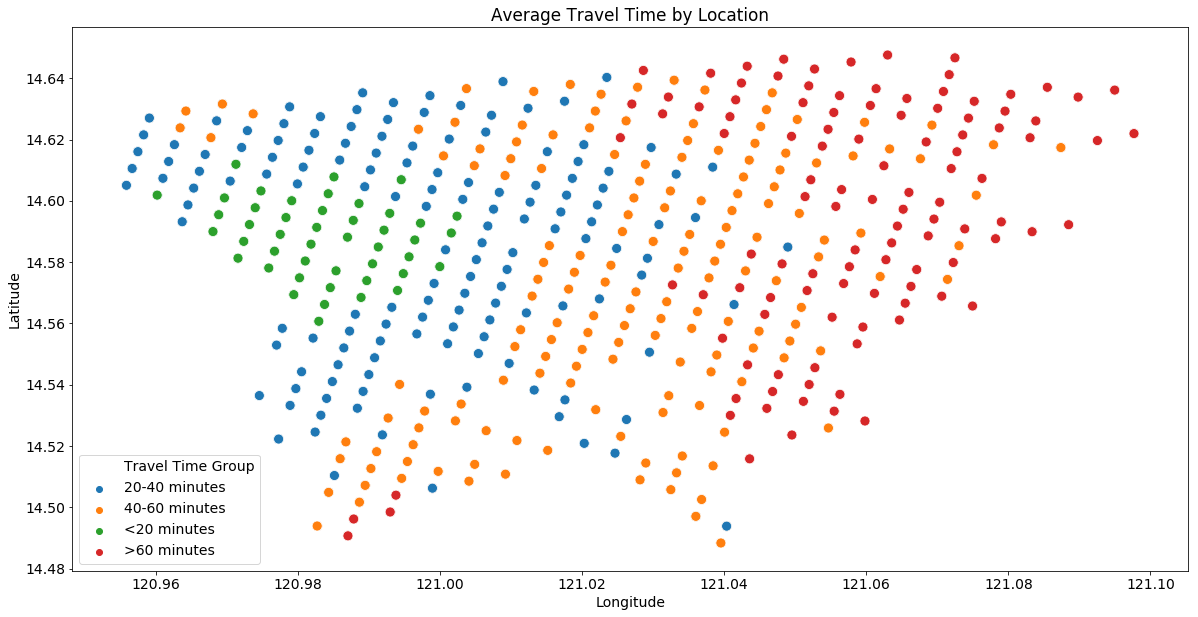

In [41]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df['Longitude'], y=df['Latitude'], hue=df['Travel Time Group'], s=100)
plt.title('Average Travel Time by Location')

Text(0.5, 1.0, 'Distribution of Ride Durations')

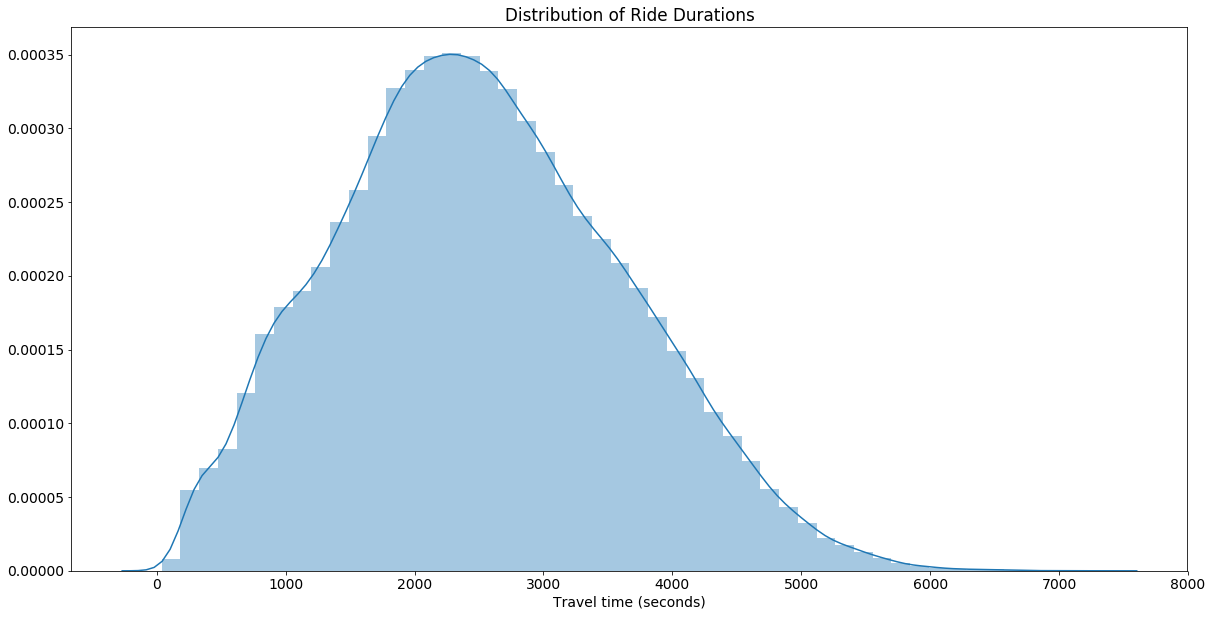

In [42]:
plt.figure(figsize=(20,10))
sns.distplot(df['Travel time (seconds)'])
plt.title('Distribution of Ride Durations')

Text(0.5, 1.0, 'Distribution of Ride Durations')

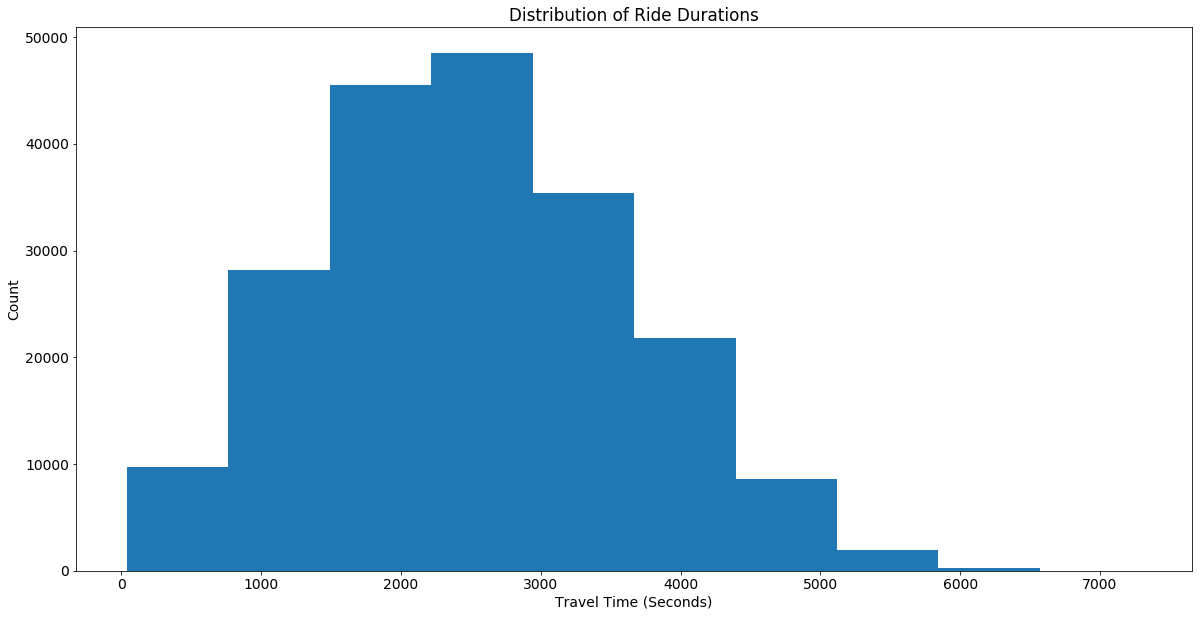

In [43]:
plt.figure(figsize=(20,10))
df['Travel time (seconds)'].plot.hist()
plt.xlabel('Travel Time (Seconds)')
plt.ylabel('Count')
plt.title('Distribution of Ride Durations')

In [44]:
df6 = df.groupby('Destination Geometry').count()
df6 = df6.drop(columns=['Destination Display Name',
                  'Travel time (seconds)',
                  'DriverID',
                  'Time',
                  'Unsafe',
                  'Rounded Hour',
                  'Month',
                  'Weekday',
                  'Day',
                  'Longitude',
                  'Latitude',
                  'Travel Time Group'])
df6.head()

,Date
Destination Geometry,
"[120,955883289562; 14,6050985554988]",386
"[120,95669085338; 14,6105864587686]",440
"[120,957498437561; 14,6160742226482]",425
"[120,958306041824; 14,6215618470181]",445
"[120,959113666307; 14,6270493318596]",455


In [45]:
df6.columns = ['Count']

Text(0.5, 1.0, 'Distribution of Locations by Number of Times Visited')

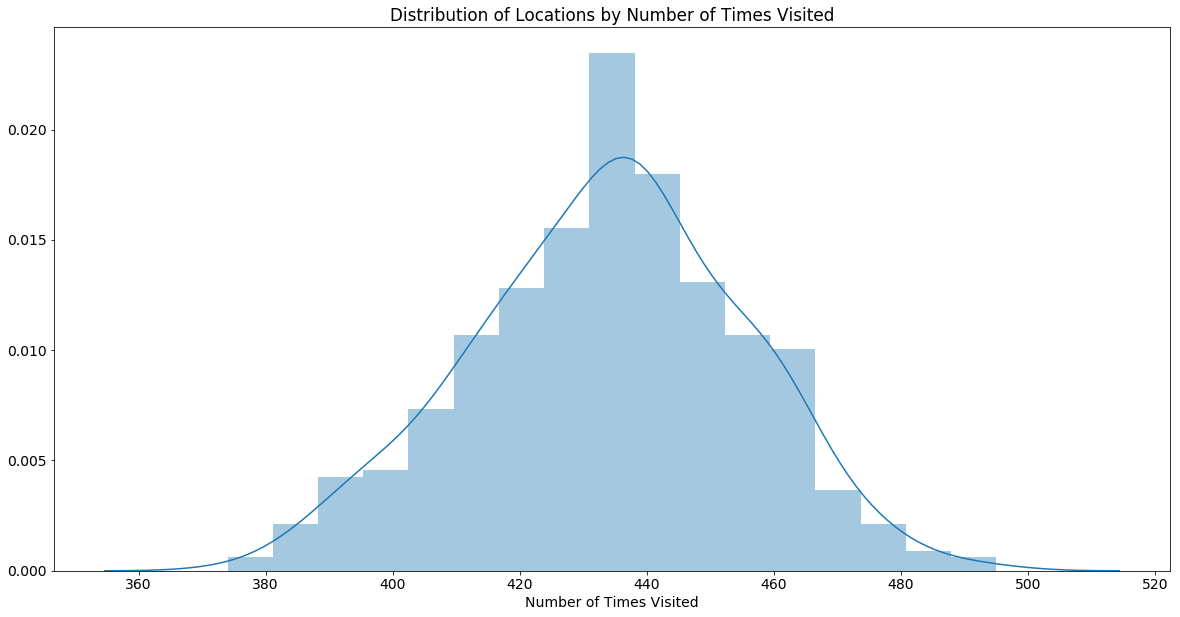

In [46]:
plt.figure(figsize=(20,10))
sns.distplot(df6['Count'])
plt.xlabel('Number of Times Visited')
plt.title('Distribution of Locations by Number of Times Visited')

Text(0.5, 1.0, 'Distribution of Locations by Number of Times Visited')

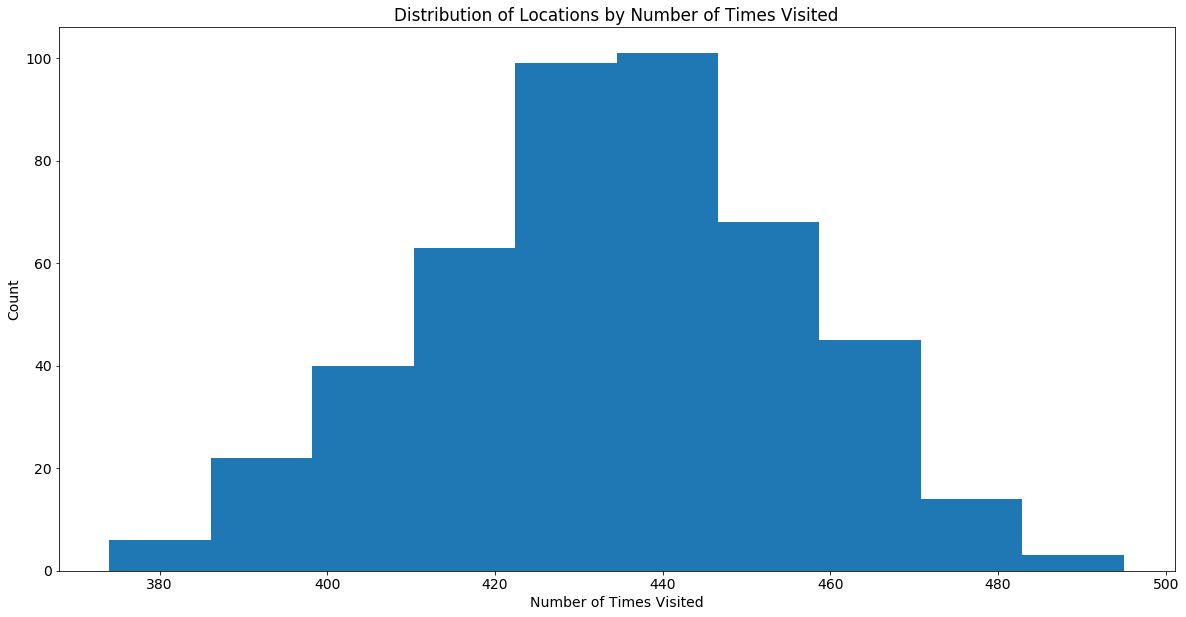

In [47]:
plt.figure(figsize=(20,10))
df6['Count'].plot.hist()
plt.xlabel('Number of Times Visited')
plt.ylabel('Count')
plt.title('Distribution of Locations by Number of Times Visited')

### Safety Analysis

In [48]:
df.head()

,Destination Display Name,Destination Geometry,Date,Travel time (seconds),DriverID,Time,Unsafe,Rounded Hour,Month,Weekday,Day,Longitude,Latitude,Travel Time Group
0,"4800 Balderama, Makati","[121,005416381948; 14,5501868058048]",2016-07-31,1224,5820,0:00:38,safe,0,7,6,31,121.005416,14.550187,20-40 minutes
1,"0 1st Street, Quezon City","[121,034062093452; 14,6142310276554]",2016-07-31,1385,5511,0:00:52,safe,0,7,6,31,121.034062,14.614231,20-40 minutes
2,"0 Hydra, Makati","[121,031114652068; 14,5616123563658]",2016-07-31,2257,5405,0:01:46,safe,0,7,6,31,121.031115,14.561612,20-40 minutes
3,"Roxas Boulevard, Pasay","[120,989193110978; 14,5378405260156]",2016-07-31,1242,5262,0:02:26,safe,0,7,6,31,120.989193,14.537841,20-40 minutes
4,"100 Jupiter, Mandaluyong","[121,019737475982; 14,5822100699773]",2016-07-31,1787,5511,0:02:36,safe,0,7,6,31,121.019737,14.582210,20-40 minutes


In [49]:
df['Unsafe'].unique()

array(['safe', 'not safe', 'unsafe'], dtype=object)

In [50]:
df['Unsafe'] = df['Unsafe'].replace('not safe', 'unsafe')
df.head()

,Destination Display Name,Destination Geometry,Date,Travel time (seconds),DriverID,Time,Unsafe,Rounded Hour,Month,Weekday,Day,Longitude,Latitude,Travel Time Group
0,"4800 Balderama, Makati","[121,005416381948; 14,5501868058048]",2016-07-31,1224,5820,0:00:38,safe,0,7,6,31,121.005416,14.550187,20-40 minutes
1,"0 1st Street, Quezon City","[121,034062093452; 14,6142310276554]",2016-07-31,1385,5511,0:00:52,safe,0,7,6,31,121.034062,14.614231,20-40 minutes
2,"0 Hydra, Makati","[121,031114652068; 14,5616123563658]",2016-07-31,2257,5405,0:01:46,safe,0,7,6,31,121.031115,14.561612,20-40 minutes
3,"Roxas Boulevard, Pasay","[120,989193110978; 14,5378405260156]",2016-07-31,1242,5262,0:02:26,safe,0,7,6,31,120.989193,14.537841,20-40 minutes
4,"100 Jupiter, Mandaluyong","[121,019737475982; 14,5822100699773]",2016-07-31,1787,5511,0:02:36,safe,0,7,6,31,121.019737,14.582210,20-40 minutes


In [51]:
df['Unsafe'].unique()

array(['safe', 'unsafe'], dtype=object)

In [52]:
df4 = pd.crosstab(df['Rounded Hour'],df['Unsafe'])
df4.head()

Unsafe,safe,unsafe
Rounded Hour,,
0,1334,756
1,2485,1704
2,2744,1512
3,2690,1273
4,3124,1055


Text(0.5, 1.0, 'Safe vs Unsafe Rides per Hour')

<Figure size 1440x720 with 0 Axes>

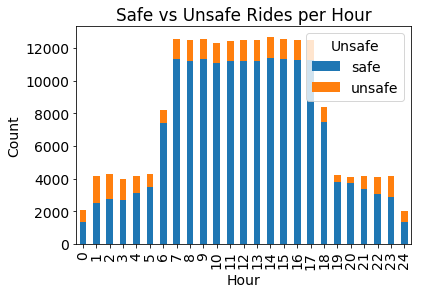

In [53]:
plt.figure(figsize=(20,10))
pd.crosstab(df['Rounded Hour'],df['Unsafe']).plot.bar(stacked=True)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Safe vs Unsafe Rides per Hour')

Text(0.5, 1.0, 'Safe vs Unsafe Rides over Travel Duration')

<Figure size 1440x720 with 0 Axes>

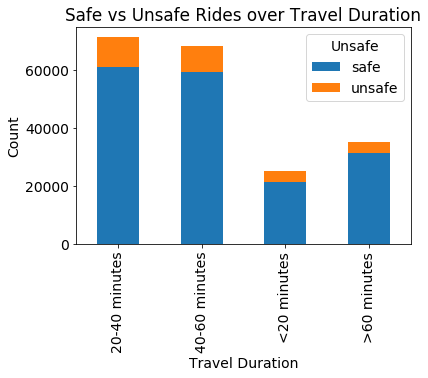

In [54]:
plt.figure(figsize=(20,10))
pd.crosstab(df['Travel Time Group'],df['Unsafe']).plot.bar(stacked=True)
plt.xlabel('Travel Duration')
plt.ylabel('Count')
plt.title('Safe vs Unsafe Rides over Travel Duration')

In [55]:
df4['% Safe'] = (df4['safe'] / (df4['safe'] + df4['unsafe'])) * 100
df4.head()

Unsafe,safe,unsafe,% Safe
Rounded Hour,,,
0,1334,756,63.827751
1,2485,1704,59.322034
2,2744,1512,64.473684
3,2690,1273,67.877870
4,3124,1055,74.754726


Text(0.5, 1.0, 'Percentage of Safe Rides by Time of Day')

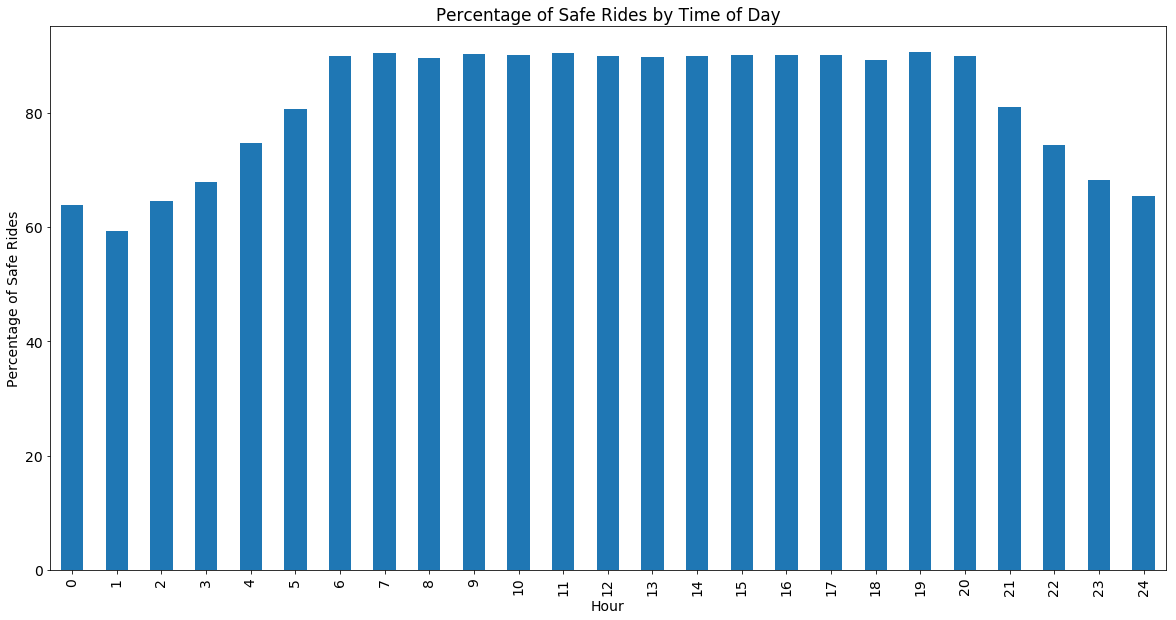

In [56]:
plt.figure(figsize=(20,10))
df4.groupby('Rounded Hour')['% Safe'].mean().plot.bar()
plt.xlabel('Hour')
plt.ylabel('Percentage of Safe Rides')
plt.title('Percentage of Safe Rides by Time of Day')

In [57]:
df5 = pd.crosstab(df['DriverID'],df['Unsafe'])
df5.head()

Unsafe,safe,unsafe
DriverID,,
5005,1598,424
5017,1374,691
5019,1805,261
5020,1386,602
5029,1312,669


In [58]:
df5['% Safe'] = (df5['safe'] / (df5['safe'] + df5['unsafe'])) * 100
df5.head()

Unsafe,safe,unsafe,% Safe
DriverID,,,
5005,1598,424,79.030663
5017,1374,691,66.537530
5019,1805,261,87.366893
5020,1386,602,69.718310
5029,1312,669,66.229177


Text(0.5, 1.0, 'Number of Drivers by Percentage of Safe Rides')

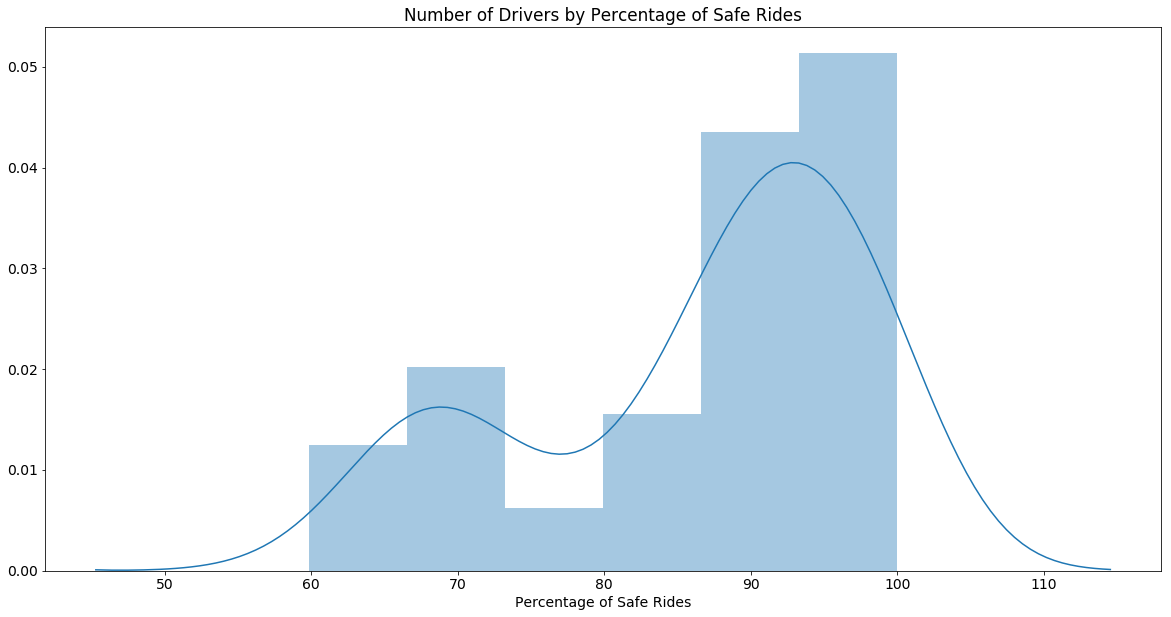

In [59]:
plt.figure(figsize=(20,10))
sns.distplot(df5['% Safe'])
plt.xlabel('Percentage of Safe Rides')
plt.title('Number of Drivers by Percentage of Safe Rides')

In [60]:
df5['% Safety round']= round(df5['% Safe'],0)
df5.head()

Unsafe,safe,unsafe,% Safe,% Safety round
DriverID,,,,
5005,1598,424,79.030663,79.0
5017,1374,691,66.537530,67.0
5019,1805,261,87.366893,87.0
5020,1386,602,69.718310,70.0
5029,1312,669,66.229177,66.0


Text(0.5, 1.0, 'Number of unsafe rides by safety record of driver')

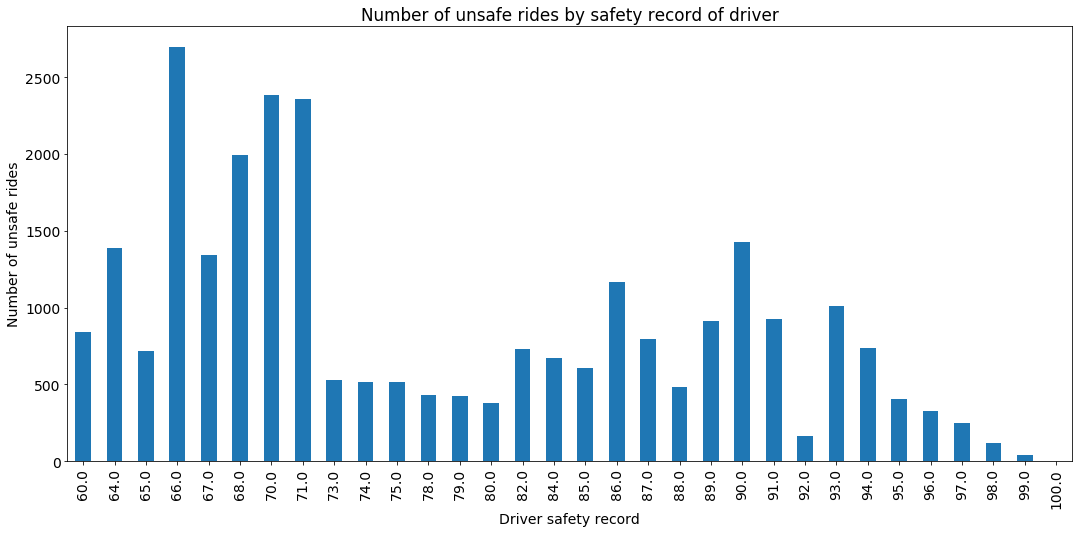

In [61]:
plt.figure(figsize=(18,8))
df5.groupby('% Safety round')['unsafe'].sum().plot.bar()
plt.xlabel('Driver safety record')
plt.ylabel('Number of unsafe rides')
plt.title('Number of unsafe rides by safety record of driver')